### Import libraries

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from regressors import stats
import seaborn as sns

### Read training dataset

In [3]:
#reading the data
data = pd.read_csv("petrol_consumption.csv")

In [23]:
#check the first five values
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [25]:
#statastical analysis
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [26]:
#check dtypes of variables
data.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

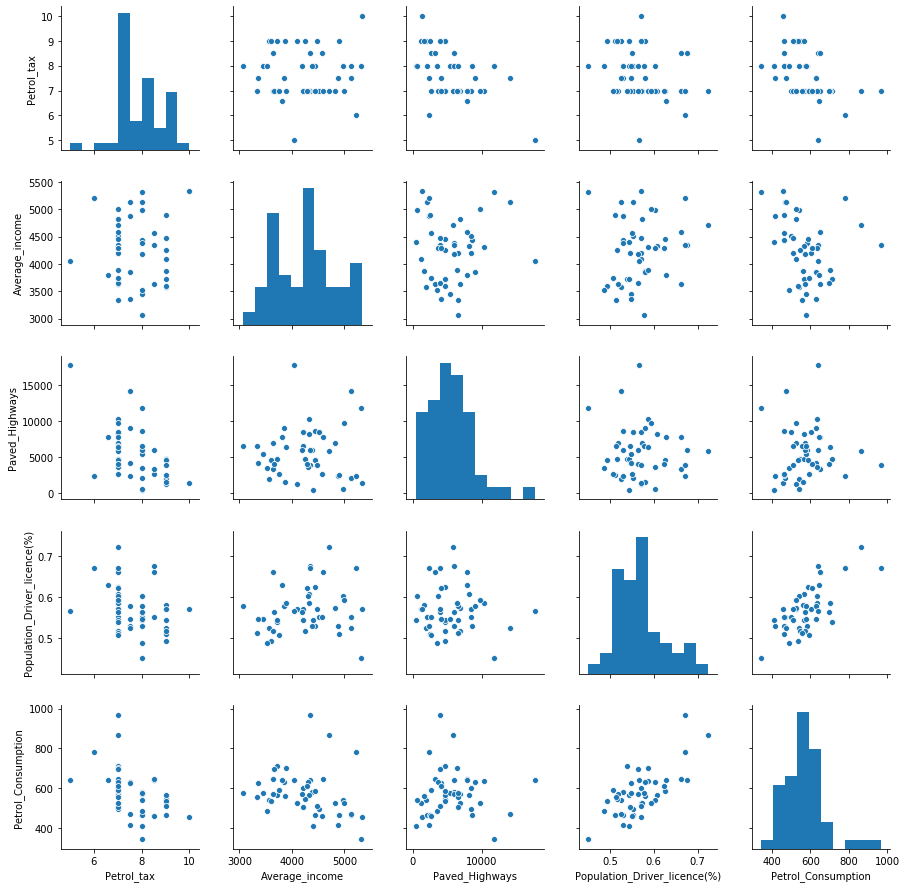

In [27]:
sns.pairplot(data)

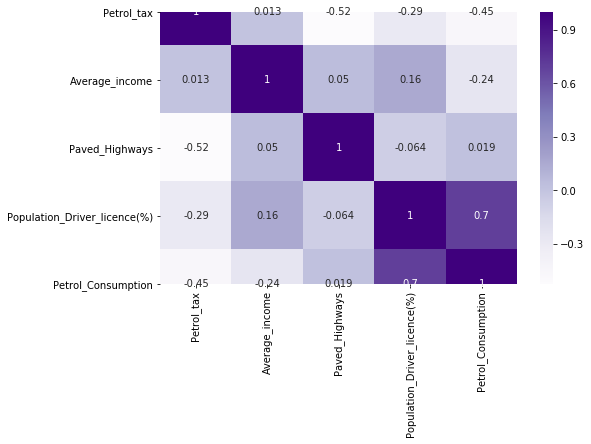

In [28]:
#coeffiient corelation of varibales
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='Purples')

In [29]:
data2 = data.copy()

### Seperating X and Y values

In [30]:
#separting independent and dependent variable to x and y
X = data2[['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)','Paved_Highways']]
y = data2['Petrol_Consumption']

In [31]:
#splitting x and y data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fitting linear model

In [32]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#getting co-effictient values(m in y=mx+c)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Population_Driver_licence(%),1341.862121
Paved_Highways,-0.004741


In [34]:
getting intercept value(c in y=mx+c)
regressor.intercept_

425.59933220242624

In [35]:
#predicting the values on x_test
y_pred = regressor.predict(X_test)

In [36]:
#finding resudial sum of square
print("Residual sum of squares: %.2f"% ((y_pred - y_test) ** 2).sum())

Residual sum of squares: 46663.45


In [37]:
#to get acuuracy
regressor.score(X,y)

0.6737990827579077

In [38]:
#to analysis the model 
feature_names = list(X.columns.values)

### Summary of model

In [39]:
stats.summary(regressor, X, y, feature_names)

Residuals:
      Min        1Q    Median        3Q       Max
 306.4529  518.4357  576.9016  643.8407  780.4633


Coefficients:
                                 Estimate  Std. Error  t value   p value
_intercept                     425.599332  160.185704   2.6569  0.010739
Petrol_tax                     -40.016660    7.535942  -5.3101  0.000003
Average_income                  -0.065413    0.003723 -17.5710  0.000000
Population_Driver_licence(%)  1341.862121  167.558716   8.0083  0.000000
Paved_Highways                  -0.004741    0.002126  -2.2299  0.030569
---
R-squared:  0.67380,    Adjusted R-squared:  0.64345
F-statistic: 22.21 on 4 features


### Lets try removing outliers

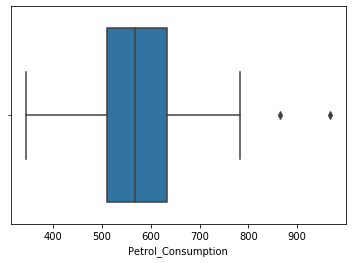

In [41]:
sns.boxplot('Petrol_Consumption',data=data2)

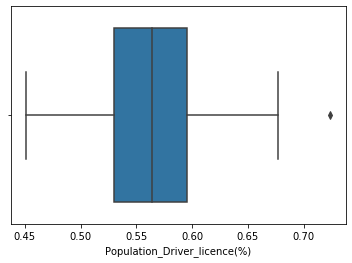

In [42]:
sns.boxplot('Population_Driver_licence(%)',data=data2)

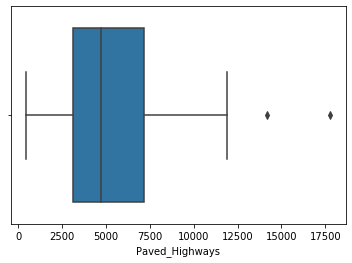

In [43]:
sns.boxplot('Paved_Highways',data=data2)

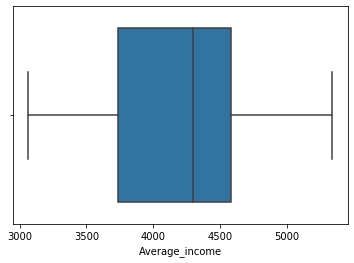

In [44]:
sns.boxplot('Average_income',data=data2)

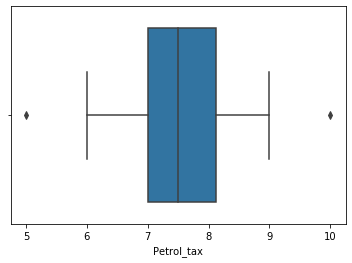

In [45]:
sns.boxplot('Petrol_tax',data=data2)

In [46]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [47]:
data_outlier = remove_outlier(data2,"Petrol_Consumption")

In [48]:
data_outlier = remove_outlier(data_outlier,"Petrol_tax")
data_outlier = remove_outlier(data_outlier,"Average_income")
data_outlier = remove_outlier(data_outlier,"Paved_Highways")
data_outlier = remove_outlier(data_outlier,"Population_Driver_licence(%)")

In [49]:
data_outlier.shape

(43, 5)

In [50]:
data_outlier.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.090934,-0.489964,-0.263974,-0.422414
Average_income,0.090934,1.000000,0.131251,0.023500,-0.575419
Paved_Highways,-0.489964,0.131251,1.000000,-0.037168,0.054160
Population_Driver_licence(%),-0.263974,0.023500,-0.037168,1.000000,0.534119
Petrol_Consumption,-0.422414,-0.575419,0.054160,0.534119,1.000000


In [51]:
#separting independent and dependent variable to x and y
X = data_outlier[['Average_income',
       'Population_Driver_licence(%)','Petrol_tax']]
y = data_outlier['Petrol_Consumption']

In [52]:
#splitting x and y data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
#fitting training data to the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#getting co-effictient values(m in y=mx+c)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Average_income,-0.082442
Population_Driver_licence(%),951.920607
Petrol_tax,-20.275472


In [55]:
y_pred = regressor.predict(X_test)

In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
32,577,660.781677
40,587,612.485174
29,534,515.239331
4,410,518.274296
10,580,505.606941
27,631,607.319501
30,571,576.373065
11,471,450.390441
41,699,617.890425


In [57]:
#finding resudial sum of square
print("Residual sum of squares: %.2f"% ((y_pred - y_test) ** 2).sum())

Residual sum of squares: 32871.63


In [58]:
#to get acuuracy
regressor.score(X,y)

0.6834927891537446

In [59]:
#to analysis the model
feature_names = list(X.columns.values)

In [33]:
stats.summary(regressor, X, y, feature_names) 

Residuals:
      Min       1Q    Median        3Q       Max
 353.8993  516.296  553.8943  603.9355  684.4006


Coefficients:
                                Estimate  Std. Error  t value   p value
_intercept                    525.294198  114.245577   4.5979  0.000039
Average_income                 -0.082442    0.001644 -50.1486  0.000000
Population_Driver_licence(%)  951.920607  148.292898   6.4192  0.000000
Petrol_tax                    -20.275472    5.852021  -3.4647  0.001236
---
R-squared:  0.68349,    Adjusted R-squared:  0.65915
F-statistic: 28.07 on 3 features
